In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


In [4]:
df = pd.read_csv('smoking.csv')
df.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [ ]:
#check for missing values
print(df.isnull().sum())

outcome    0
smoker     0
age        0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
df = pd.read_csv('smoking.csv')

# Preprocess the data - Encode categorical variables using LabelEncoder
le = LabelEncoder()
df['outcome'] = le.fit_transform(df['outcome'])  # Alive -> 0, Dead -> 1
df['smoker'] = le.fit_transform(df['smoker'])  # No -> 0, Yes -> 1

#check for missing values
print(df.isnull().sum())

# Split the data into features (X) and target (y)
X = df[['smoker', 'age']]
y = df['outcome']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Use X instead of x



outcome    0
smoker     0
age        0
dtype: int64


In [ ]:
# Model building (Logistic Regression)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,753 (42.00 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 0 (0.00 B)

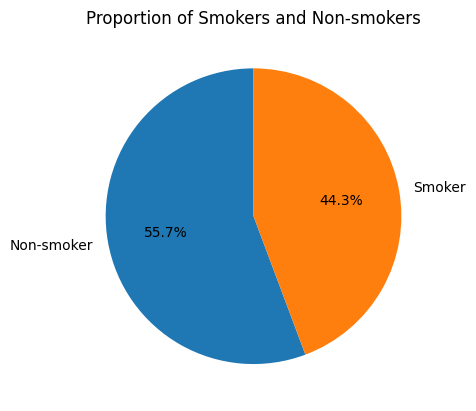

In [ ]:
#pie chart
smoker_counts = df['smoker'].value_counts()  # Count the occurrences of each smoker category
plt.pie(smoker_counts, labels=['Non-smoker', 'Smoker'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Smokers and Non-smokers')
plt.show()

In [ ]:
# Model evaluation
y_pred = model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       196
           1       0.67      0.60      0.63        67

    accuracy                           0.82       263
   macro avg       0.77      0.75      0.76       263
weighted avg       0.82      0.82      0.82       263

Confusion Matrix:
 [[176  20]
 [ 27  40]]


outcome
0    945
1    369
Name: count, dtype: int64


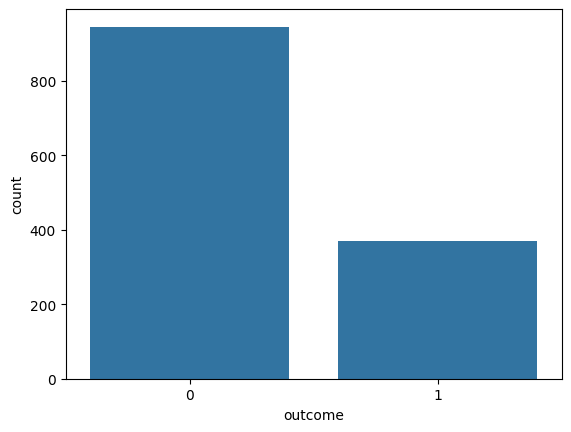

In [ ]:
#check if data is balanced or not as we previously did data.head()
import seaborn as sns
# Check for class imbalance
print(df['outcome'].value_counts())
# Visualize class distribution
sns.countplot(x='outcome', data=df)
plt.show()

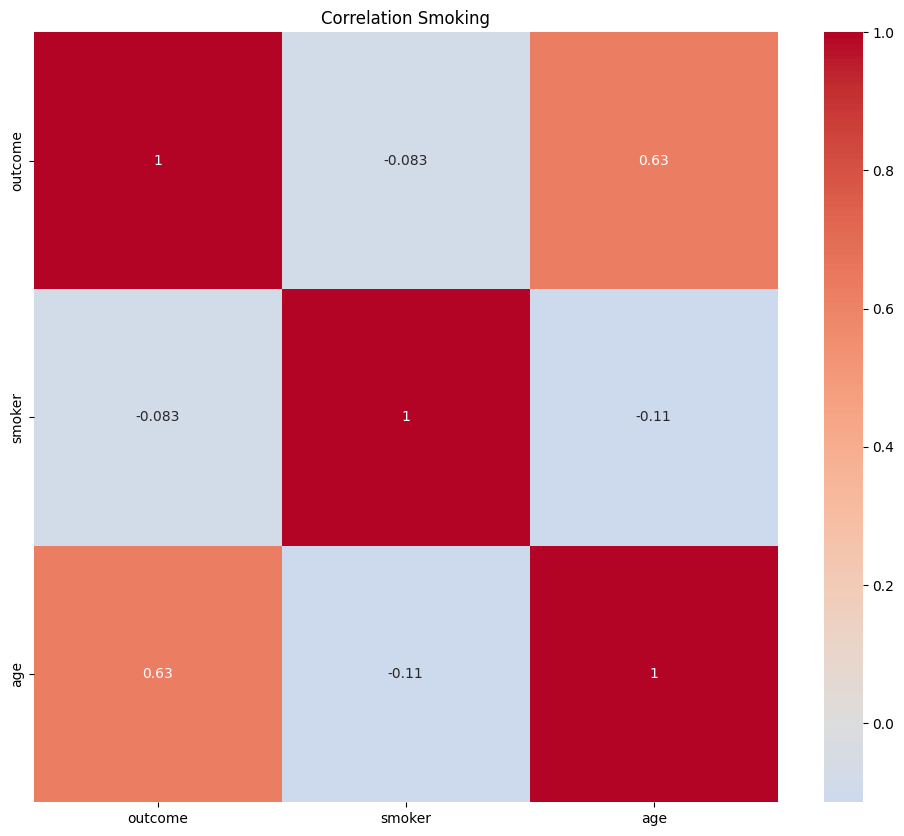

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Smoking')
plt.show()

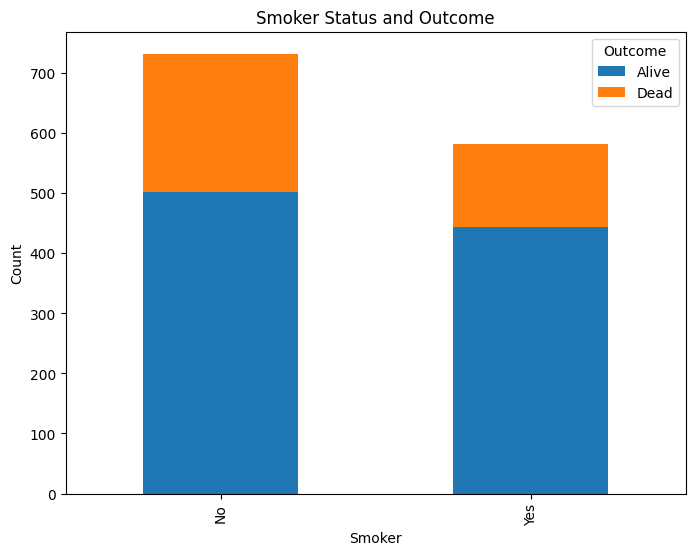

In [5]:
smoker_outcome_counts = pd.crosstab(df['smoker'], df['outcome'])
smoker_outcome_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Smoker Status and Outcome')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.show()

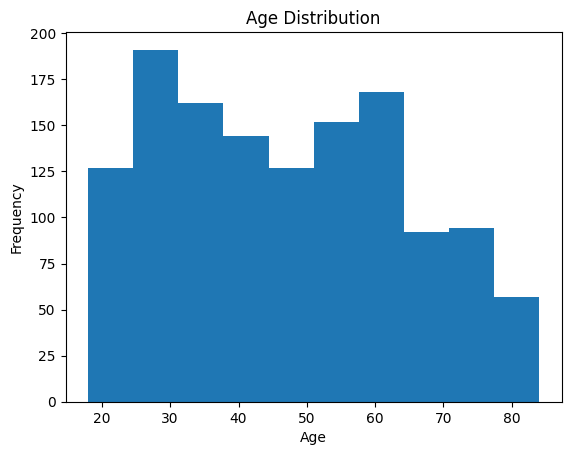

In [6]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
x_train.head()

,smoker,age
503,1,27
140,1,47
904,0,68
344,1,47
199,0,51


In [ ]:
#make predictions on test set
y_pred = model.predict(x_test)

In [ ]:
#Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8212927756653993


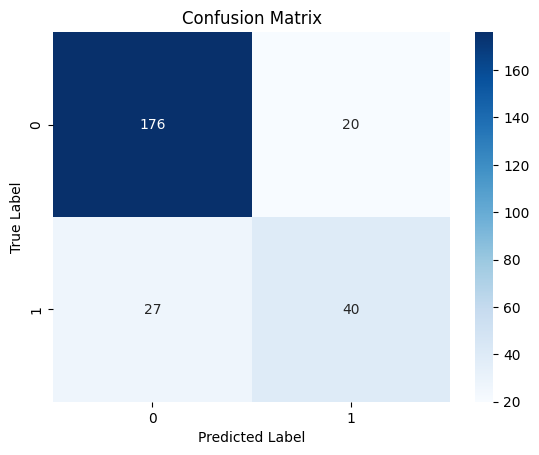

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Feature importance
coefficients = pd.DataFrame(model.coef_.T, index=x.columns, columns=['Coefficients'])
print(coefficients)

        Coefficients
smoker      0.130338
age         0.125852


In [ ]:
# save the model to a file
import joblib
joblib.dump(model, 'lrmodel_smoking.pkl')

['lrmodel_smoking.pkl']

In [ ]:
#predictions on new data
new_data = pd.DataFrame({'smoker': [1, 0], 'age': [45, 60]})
predictions = model.predict(new_data)

# Printing the predictions using if-else
for i, prediction in enumerate(predictions):
    if prediction == 0:
        outcome = 'Alive'
    else:
        outcome = 'Dead'
    print(f"Prediction for data point {i+1}: {outcome}")

Prediction for data point 1: Alive
Prediction for data point 2: Alive
